In [1]:
#b'4040333716165343643699066
from PIL import Image
import zbarlight
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import qrcode
%matplotlib inline

In [2]:
qrimage = sorted(glob.glob('QR_RAW/screen*.png'))
qrimage[0:10], len(qrimage)

(['QR_RAW/screen1487506633.png',
  'QR_RAW/screen1487506664.png',
  'QR_RAW/screen1487506695.png',
  'QR_RAW/screen1487506725.png',
  'QR_RAW/screen1487506756.png',
  'QR_RAW/screen1487506786.png',
  'QR_RAW/screen1487506817.png',
  'QR_RAW/screen1487506848.png',
  'QR_RAW/screen1487506878.png',
  'QR_RAW/screen1487506909.png'],
 780)

In [3]:
codes = [None]*len(qrimage)

In [4]:
count = -1
for qr in qrimage:
    count += 1
    file_path = '/home/charles/Desktop/Yoyo/'+ qr
    with open(file_path, 'rb') as image_file:
        image = Image.open(image_file)
        image.load()
    co = zbarlight.scan_codes('qrcode', image)
    if str(type(co)) != "<class 'NoneType'>":
        codes[count] = [int(s) for s in co[0].split() if s.isdigit()][0]
    if str(type(co)) == "<class 'NoneType'>":        
        codes[count] = co
#print(codes)

In [5]:
def lastnine(x):
    if str(type(x)) == "<class 'NoneType'>":        
        return(None)
    if str(type(x)) != "<class 'NoneType'>":        
        return(int(str(x)[-9:]))

In [6]:
codes = [lastnine(x) for x in codes]

In [7]:
bkup = codes.copy()

In [8]:
codes = bkup.copy()

In [9]:
codes = np.asarray(codes,dtype=np.float)

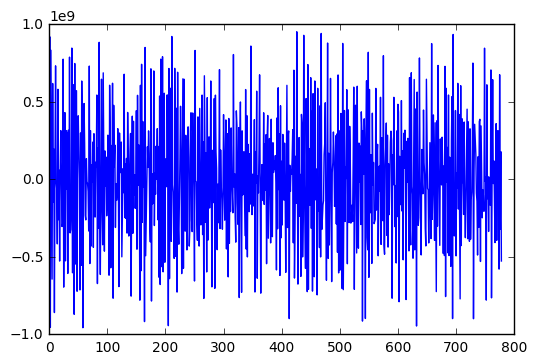

In [10]:
plt.plot(np.diff(codes))

In [11]:
np.savetxt("qrcodes_read.csv", codes, delimiter=",")

In [12]:
file = open('input.txt','w')
for line in codes:
    file.write(str(line).zfill(9)+'\n')
file.close()

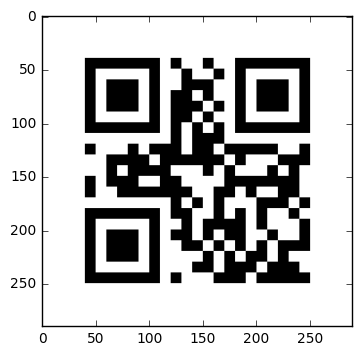

In [13]:
img = qrcode.make(str(4040333716165343) + str(int(codes[1])).zfill(9))
plt.imshow(img)